In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Problem Statement**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
df_train =pd.read_csv("/content/train.csv")

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_test=pd.read_csv("/content/test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4.0,5.0,12.0


In [ ]:
#merge both train and test data
df=df_train.append(df_test)
df.head()

<ipython-input-16-557e98c75e30>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     266050 non-null  int64  
 1   Product_ID                  266050 non-null  object 
 2   Gender                      266050 non-null  object 
 3   Age                         266050 non-null  object 
 4   Occupation                  266050 non-null  int64  
 5   City_Category               266050 non-null  object 
 6   Stay_In_Current_City_Years  266050 non-null  object 
 7   Marital_Status              266050 non-null  int64  
 8   Product_Category_1          266049 non-null  float64
 9   Product_Category_2          183509 non-null  float64
 10  Product_Category_3          81124 non-null   float64
 11  Purchase                    112935 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 26.4+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.660500e+05,266050.000000,266050.000000,266049.000000,183509.000000,81124.000000,112935.000000
mean,1.002979e+06,8.091002,0.409991,5.285034,9.851005,12.664181,9303.174543
std,1.710076e+03,6.516214,0.491833,3.738328,5.093766,4.122853,4973.375291
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001483e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5855.000000
50%,1.003022e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.004411e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12056.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [ ]:
df['Gender']=df['Gender'].map({'F':0,'M':1})    #for converting the male and female to 0 and 1
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [ ]:
#handle the categorical feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8.0,NaN,NaN,7969.0


In [ ]:
#handle the categorical feature city Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()


,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8.0,NaN,NaN,7969.0,0,1


In [ ]:
df.drop("City_Category",axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8.0,NaN,NaN,7969.0,0,1


In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 1
Product_Category_2             82541
Product_Category_3            184926
Purchase                      153115
B                                  0
C                                  0
dtype: int64

In [ ]:
#focus on replacing the missing values
df['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [ ]:
df['Product_Category_1'].value_counts()

5.0     73931
1.0     68489
8.0     55313
11.0    11815
2.0     11620
6.0      9912
3.0      9844
4.0      5710
16.0     4644
15.0     3066
13.0     2673
10.0     2541
12.0     1907
7.0      1827
18.0     1489
14.0      757
17.0      282
9.0       229
Name: Product_Category_1, dtype: int64

In [ ]:
#replace the missing value with mode
df['Product_Category_1']=df['Product_Category_1'].fillna(df['Product_Category_1'].mode()[0])

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             82541
Product_Category_3            184926
Purchase                      153115
B                                  0
C                                  0
dtype: int64

In [ ]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      153115
B                                  0
C                                  0
dtype: int64

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8.0,8.0,16.0,7969.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  266050 non-null  object 
 1   Gender                      266050 non-null  int64  
 2   Age                         266050 non-null  int64  
 3   Occupation                  266050 non-null  int64  
 4   Stay_In_Current_City_Years  266050 non-null  object 
 5   Marital_Status              266050 non-null  int64  
 6   Product_Category_1          266050 non-null  float64
 7   Product_Category_2          266050 non-null  float64
 8   Product_Category_3          266050 non-null  float64
 9   Purchase                    112935 non-null  float64
 10  B                           266050 non-null  uint8  
 11  C                           266050 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 22.8+ MB


In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     93898
2     49518
3     45756
4+    41068
0     35810
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-43-c3f2261216ce>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].str.replace('+','')


In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8.0,8.0,16.0,7969.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  266050 non-null  object 
 1   Gender                      266050 non-null  int64  
 2   Age                         266050 non-null  int64  
 3   Occupation                  266050 non-null  int64  
 4   Stay_In_Current_City_Years  266050 non-null  object 
 5   Marital_Status              266050 non-null  int64  
 6   Product_Category_1          266050 non-null  float64
 7   Product_Category_2          266050 non-null  float64
 8   Product_Category_3          266050 non-null  float64
 9   Purchase                    112935 non-null  float64
 10  B                           266050 non-null  uint8  
 11  C                           266050 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 22.8+ MB


In [ ]:
#convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  266050 non-null  object 
 1   Gender                      266050 non-null  int64  
 2   Age                         266050 non-null  int64  
 3   Occupation                  266050 non-null  int64  
 4   Stay_In_Current_City_Years  266050 non-null  int64  
 5   Marital_Status              266050 non-null  int64  
 6   Product_Category_1          266050 non-null  float64
 7   Product_Category_2          266050 non-null  float64
 8   Product_Category_3          266050 non-null  float64
 9   Purchase                    112935 non-null  float64
 10  B                           266050 non-null  uint8  
 11  C                           266050 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(2)
memory usage: 22.8+ MB


In [ ]:
df['B']=df['B'].astype(np.int64)
df['C']=df['C'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  266050 non-null  object 
 1   Gender                      266050 non-null  int64  
 2   Age                         266050 non-null  int64  
 3   Occupation                  266050 non-null  int64  
 4   Stay_In_Current_City_Years  266050 non-null  int64  
 5   Marital_Status              266050 non-null  int64  
 6   Product_Category_1          266050 non-null  float64
 7   Product_Category_2          266050 non-null  float64
 8   Product_Category_3          266050 non-null  float64
 9   Purchase                    112935 non-null  float64
 10  B                           266050 non-null  int64  
 11  C                           266050 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 26.4+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

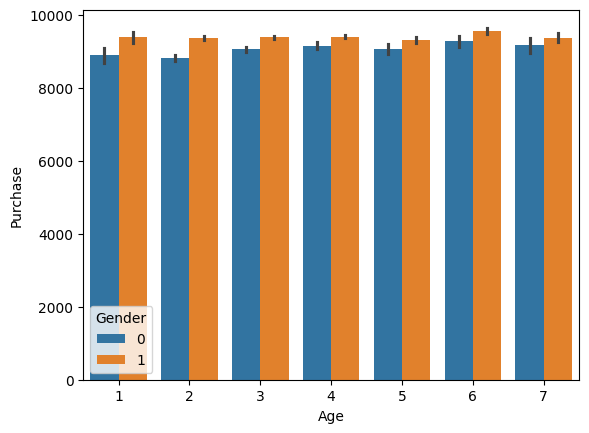

In [ ]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)


**Purchasing of men is high then women**

<Axes: xlabel='Occupation', ylabel='Purchase'>

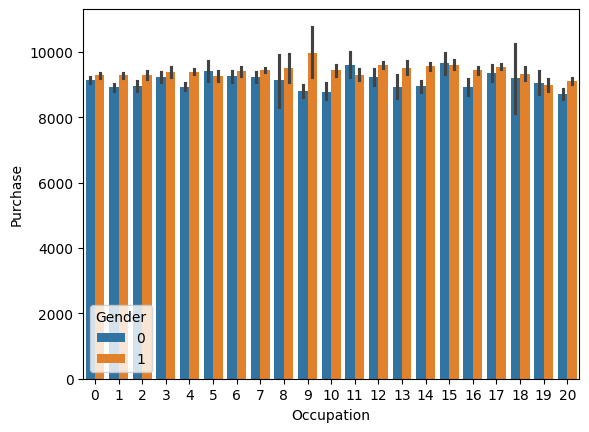

In [ ]:
#visualiztion of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

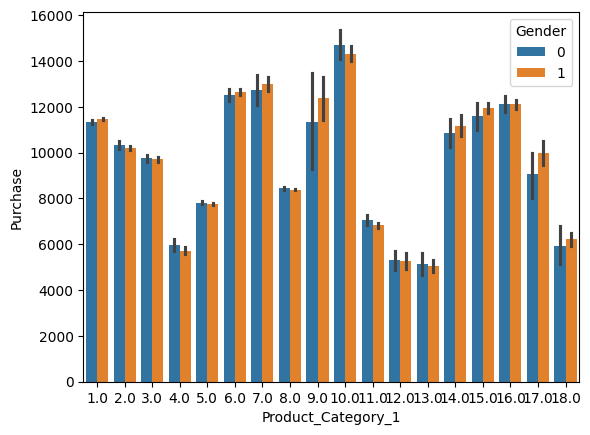

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

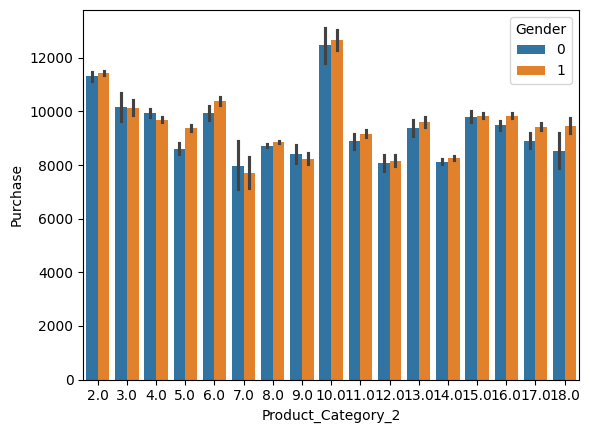

In [ ]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

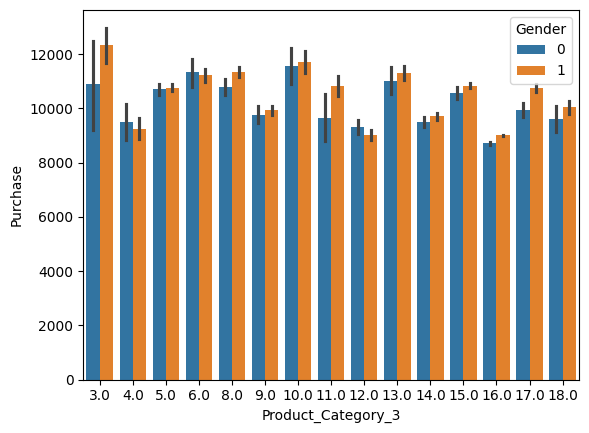

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

# **FEATURE SCALING**

In [ ]:
df_test=df[df['Purchase'].isnull()]

In [ ]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
X=df_train.drop('Purchase',axis=1)

In [ ]:
X.shape

(112935, 11)

In [ ]:
y=df_train['Purchase']
y.shape

(112935,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Finished the data analysis part all done now just train your model